In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Step Count Data.csv')

In [4]:
data.head()

,Date/Time,Step Count (count),Source
0,2018-05-24 12:00:00 AM,5783.0,iPhone
1,2018-05-25 12:00:00 AM,15467.0,iPhone
2,2018-05-26 12:00:00 AM,2838.0,iPhone
3,2018-05-27 12:00:00 AM,3546.0,iPhone
4,2018-05-28 12:00:00 AM,7360.0,iPhone


In [5]:
data.pop('Source')

0                iPhone
1                iPhone
2                iPhone
3                iPhone
4                iPhone
             ...       
2067    iPhone|Dona (2)
2068    iPhone|Dona (2)
2069    iPhone|Dona (2)
2070    iPhone|Dona (2)
2071    iPhone|Dona (2)
Name: Source, Length: 2072, dtype: object

In [6]:
data.head()

,Date/Time,Step Count (count)
0,2018-05-24 12:00:00 AM,5783.0
1,2018-05-25 12:00:00 AM,15467.0
2,2018-05-26 12:00:00 AM,2838.0
3,2018-05-27 12:00:00 AM,3546.0
4,2018-05-28 12:00:00 AM,7360.0


In [7]:
data['Date/Time']=pd.to_datetime(data['Date/Time'])

In [8]:
data['Date/Time'] = data['Date/Time'].dt.date

In [9]:
data.head()

,Date/Time,Step Count (count)
0,2018-05-24,5783.0
1,2018-05-25,15467.0
2,2018-05-26,2838.0
3,2018-05-27,3546.0
4,2018-05-28,7360.0


In [10]:
data['Step Count (count)']=data['Step Count (count)'].astype(int)

In [11]:
data.head()

,Date/Time,Step Count (count)
0,2018-05-24,5783
1,2018-05-25,15467
2,2018-05-26,2838
3,2018-05-27,3546
4,2018-05-28,7360


In [12]:
data.shape[0]

2072

In [13]:
data=data.rename(columns={'Date/Time':'Date', 'Step Count (count)':'Steps'})

In [14]:
summary_stats=data['Steps'].describe()
print("Summary Statistics for Steps:")
print(summary_stats)

Summary Statistics for Steps:
count     2072.000000
mean      7321.377413
std       5383.043603
min          9.000000
25%       3173.750000
50%       6585.500000
75%      10162.250000
max      39761.000000
Name: Steps, dtype: float64


In [27]:
from datetime import datetime

In [30]:
date_min_steps=data.loc[data['Steps'].idxmin()]['Date']
date_max_steps=data.loc[data['Steps'].idxmax()]['Date']
print("Date with Minimum Steps:", date_min_steps.strftime("%dth of %B"))  #pandas Timestamp object converted to smth more readable
print("Date with Maximum Steps:", date_max_steps.strftime("%dth of %B"))

Date with Minimum Steps: 14th of June
Date with Maximum Steps: 30th of September


In [16]:
import matplotlib.pyplot as plt

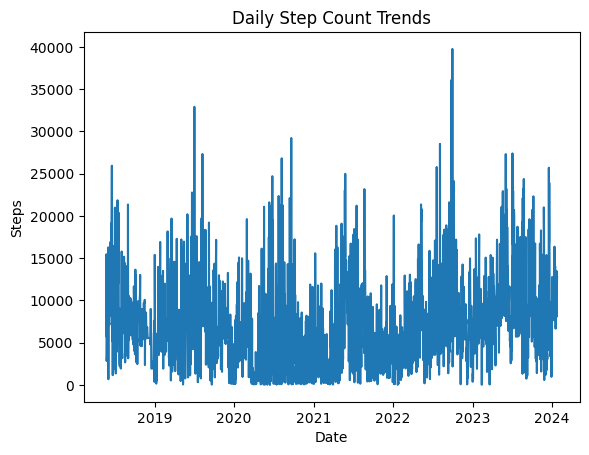

In [17]:
plt.plot_date(data['Date'], data['Steps'], '-')
plt.title('Daily Step Count Trends')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.show()

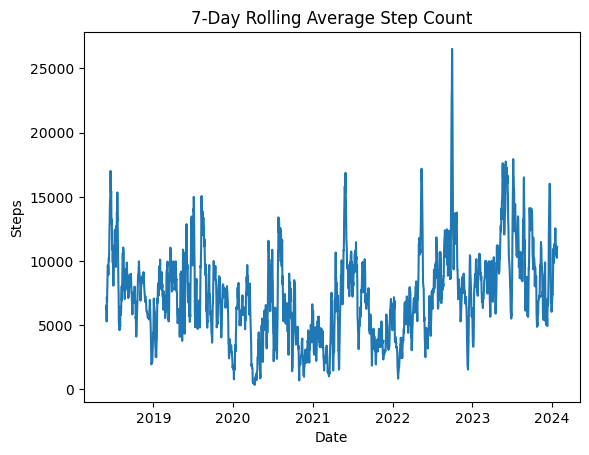

In [18]:
data['rolling_avg'] = data['Steps'].rolling(window=7).mean()  # 7-day rolling average is just an example
plt.plot_date(data['Date'], data['rolling_avg'], '-')
plt.title('7-Day Rolling Average Step Count')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.show()

In [19]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month']=data['Date'].dt.to_period('M')
data.head()

,Date,Steps,rolling_avg,Month
0,2018-05-24,5783,NaN,2018-05
1,2018-05-25,15467,NaN,2018-05
2,2018-05-26,2838,NaN,2018-05
3,2018-05-27,3546,NaN,2018-05
4,2018-05-28,7360,NaN,2018-05


In [20]:
agr_data=data.groupby('Month')['Steps'].sum().reset_index()
agr_data.sample(n=5)


,Month,Steps
22,2020-03,152804
15,2019-08,327244
67,2023-12,259463
8,2019-01,198533
28,2020-09,146427


In [22]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

avg_steps_per_month = data.groupby('Month')['Steps'].mean().reset_index()

# Display the results
print("Average Steps per Month Across the Years:")
print(avg_steps_per_month)

Average Steps per Month Across the Years:
    Month        Steps
0       1  6208.229050
1       2  5801.773050
2       3  6135.006452
3       4  6267.866667
4       5  9110.134969
5       6  9098.922222
6       7  9040.000000
7       8  9174.591398
8       9  8222.372222
9      10  6912.053763
10     11  6035.261111
11     12  5305.252688


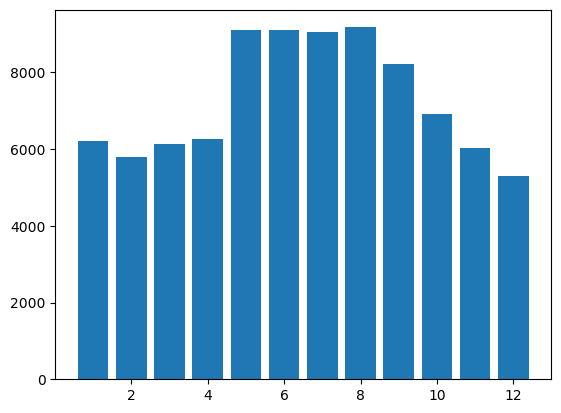

In [23]:
plt.bar(avg_steps_per_month['Month'], avg_steps_per_month['Steps'])
plt.show()

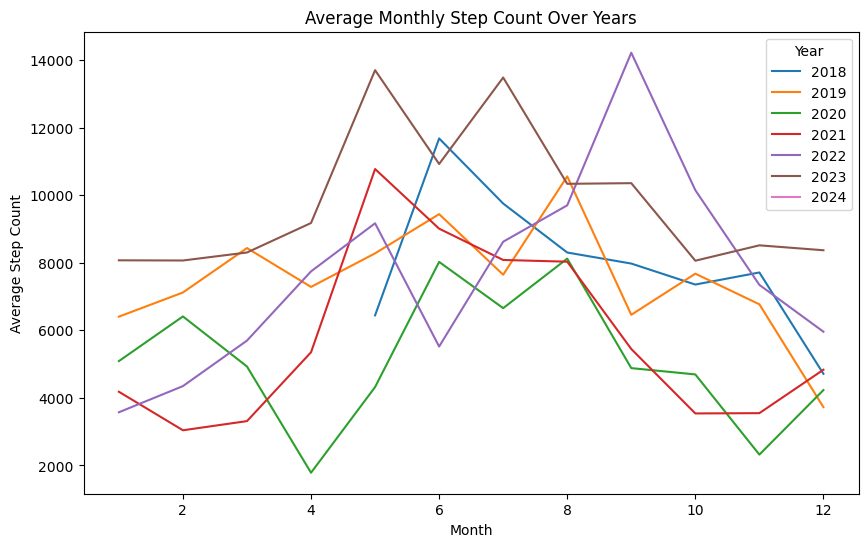

In [32]:
avg_steps_per_month_eachyear = data.groupby(['Year','Month'])['Steps'].mean().reset_index()
plt.figure(figsize=(10, 6))
for year in avg_steps_per_month_eachyear['Year'].unique():
    year_data = avg_steps_per_month_eachyear[avg_steps_per_month_eachyear['Year']==year]
    plt.plot(year_data['Month'], year_data['Steps'], label=str(year))

plt.xlabel('Month')
plt.ylabel('Average Step Count')
plt.title('Average Monthly Step Count Over Years')
plt.legend(title='Year')
plt.show()

In [43]:
idxmin = data.groupby('Year')['Steps'].idxmin()  #series with year and indices of the rows with min steps
idxmax = data.groupby('Year')['Steps'].idxmax() 

min_steps = data.loc[idxmin][['Year', 'Date', 'Steps']]  #locate the indices and return a df with given columns
max_steps = data.loc[idxmax][['Year', 'Date', 'Steps']]

min_steps = min_steps.rename(columns={'Date': 'Min Date', 'StepCount': 'Min StepCount'})
max_steps = max_steps.rename(columns={'Date': 'Max Date', 'StepCount': 'Max StepCount'})

min_steps['Min Date'] = min_steps['Min Date'].dt.strftime('%B %d')
max_steps['Max Date'] = max_steps['Max Date'].dt.strftime('%B %d')
result = pd.merge(min_steps, max_steps, on='Year')

# Display the result
print(result)

   Year      Min Date  Steps_x      Max Date  Steps_y
0  2018       June 03      688       June 19    25944
1  2019  September 21       52       July 03    32913
2  2020       June 14        9  September 20    29220
3  2021      March 31       56        May 26    24981
4  2022    January 22       26  September 30    39761
5  2023   February 12       28       July 03    27402
6  2024    January 17     6667    January 12    16371
